# <span style = "color: green"> Employee attrition Classification </span>

***

The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.

### Let's Dive into it

#### Import necessary libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read 'HR-Employee-Attrition.csv' dataset and store it inside a variable

In [56]:
df = pd.read_csv('HR-Employee-Attrition.csv')

### Check head

In [57]:
pd.set_option("display.max_columns", None)

In [58]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Check last 5 rows

In [59]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


### Check shape

In [60]:
df.shape

(1470, 35)

### View info about the dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### View basic statistical information about the dataset

In [62]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check for null values

In [63]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### View unique values in all categorical columns

In [64]:
categorical_columns = df.select_dtypes('object').columns


for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Attrition': ['Yes' 'No']
Unique values in column 'BusinessTravel': ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in column 'Department': ['Sales' 'Research & Development' 'Human Resources']
Unique values in column 'EducationField': ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'JobRole': ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in column 'MaritalStatus': ['Single' 'Married' 'Divorced']
Unique values in column 'Over18': ['Y']
Unique values in column 'OverTime': ['Yes' 'No']


### Check the number of unique values in all columns

In [65]:

for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_values}")


Number of unique values in column 'Age': 43
Number of unique values in column 'Attrition': 2
Number of unique values in column 'BusinessTravel': 3
Number of unique values in column 'DailyRate': 886
Number of unique values in column 'Department': 3
Number of unique values in column 'DistanceFromHome': 29
Number of unique values in column 'Education': 5
Number of unique values in column 'EducationField': 6
Number of unique values in column 'EmployeeCount': 1
Number of unique values in column 'EmployeeNumber': 1470
Number of unique values in column 'EnvironmentSatisfaction': 4
Number of unique values in column 'Gender': 2
Number of unique values in column 'HourlyRate': 71
Number of unique values in column 'JobInvolvement': 4
Number of unique values in column 'JobLevel': 5
Number of unique values in column 'JobRole': 9
Number of unique values in column 'JobSatisfaction': 4
Number of unique values in column 'MaritalStatus': 3
Number of unique values in column 'MonthlyIncome': 1349
Number of

### Print out the names of the columns having only one unique values 

In [66]:
print([column for column in df.columns if df[column].nunique() == 1])

['EmployeeCount', 'Over18', 'StandardHours']


### Drop these columns as they won't be useful in our predicition

In [67]:
dele = ['EmployeeCount', 'Over18']

df.drop(dele, axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


### Drop EmployeeNumber column aswell

In [68]:
df.drop('EmployeeNumber', axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


### Create following groupby valuecounts

In [69]:
group_counts = df.groupby(['Department', 'EducationField'])['Gender'].value_counts()
group_counts

Department              EducationField    Gender
Human Resources         Human Resources   Male       19
                                          Female      8
                        Life Sciences     Female      9
                                          Male        7
                        Medical           Male       11
                                          Female      2
                        Other             Male        3
                        Technical Degree  Male        3
                                          Female      1
Research & Development  Life Sciences     Male      274
                                          Female    166
                        Medical           Male      211
                                          Female    152
                        Other             Male       39
                                          Female     25
                        Technical Degree  Male       58
                                          Female     36

# <span style = "color: orange"> Data Visualization </span>

### Plot the following

<Axes: xlabel='Attrition', ylabel='count'>

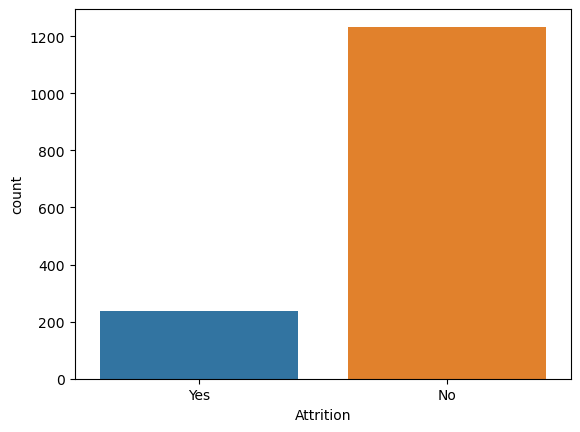

In [18]:
sns.countplot(x ='Attrition', data=df )

<Axes: xlabel='Attrition', ylabel='count'>

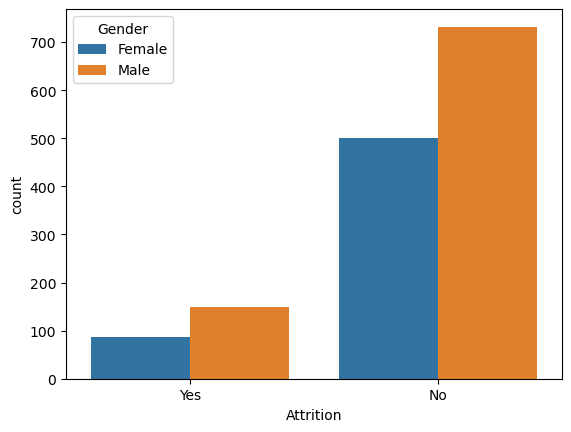

In [19]:
sns.countplot(x='Attrition', hue= 'Gender', data=df)

<Axes: xlabel='Attrition', ylabel='count'>

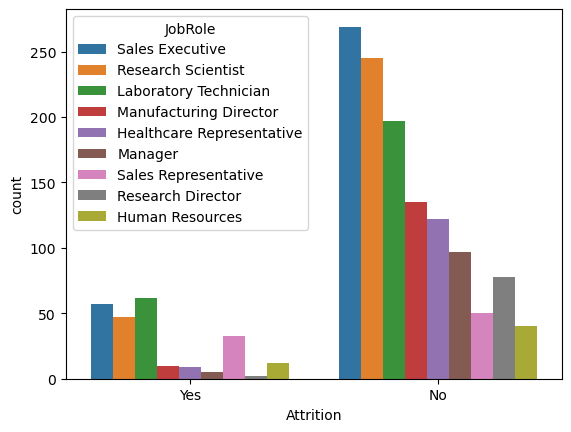

In [20]:
sns.countplot(x='Attrition', hue= 'JobRole', data=df)

<Axes: xlabel='OverTime', ylabel='count'>

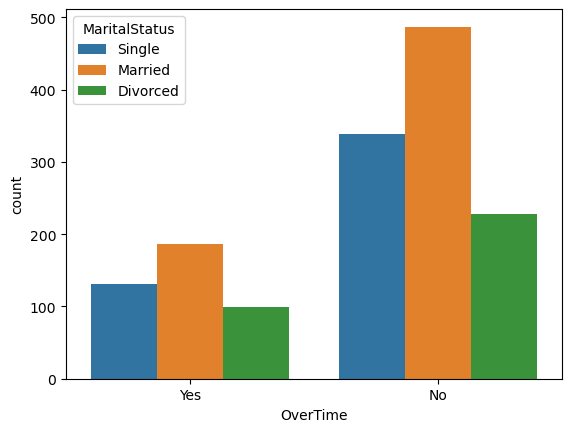

In [21]:
sns.countplot(x='OverTime', hue= 'MaritalStatus', data=df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

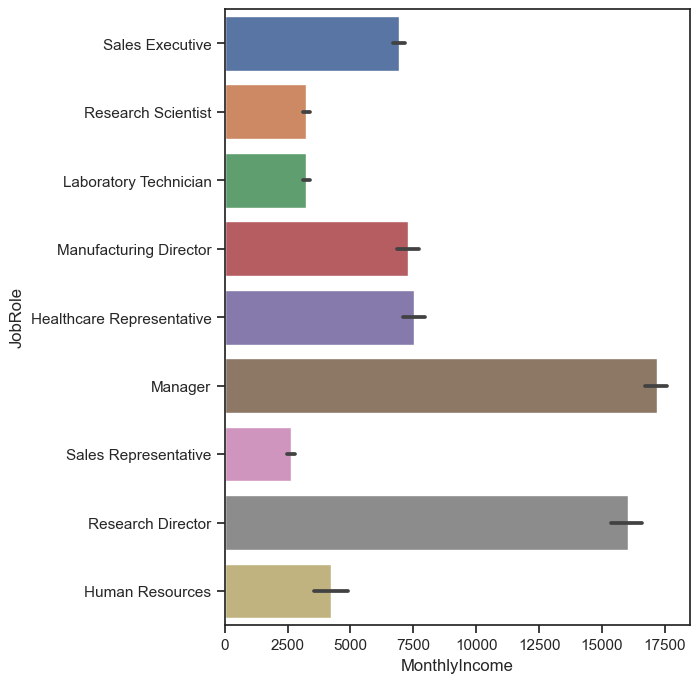

In [40]:
plt.figure(figsize=(6, 8))
sns.barplot(x ='MonthlyIncome', y= 'JobRole', data= df)

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

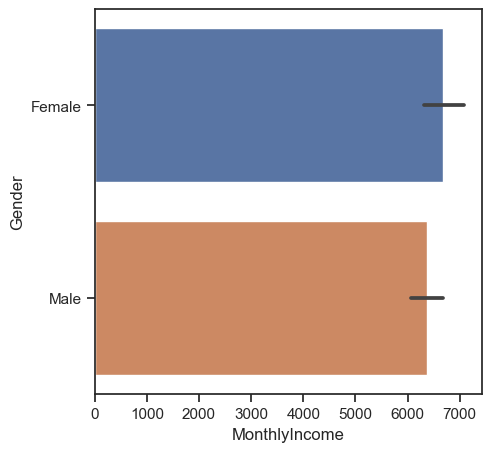

In [41]:
plt.figure(figsize=(5, 5))
sns.barplot(x ='MonthlyIncome', y= 'Gender', data= df)

<Axes: xlabel='MonthlyIncome', ylabel='EducationField'>

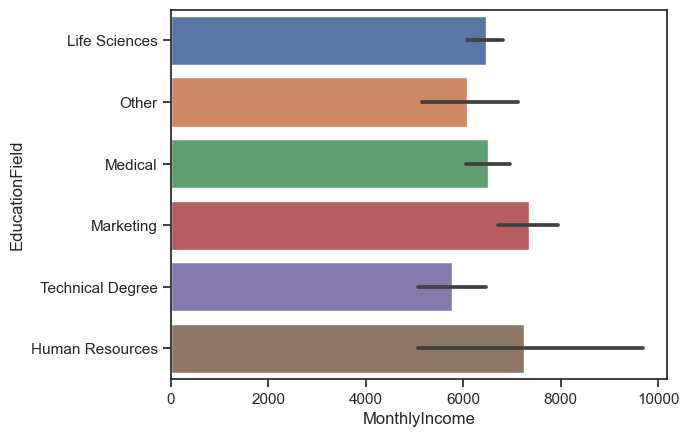

In [42]:
sns.barplot(x ='MonthlyIncome', y= 'EducationField', data= df)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

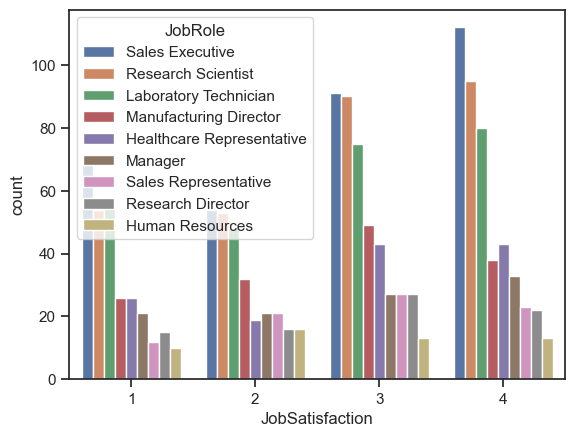

In [43]:
sns.countplot(x='JobSatisfaction', hue= 'JobRole', data=df)

<Axes: xlabel='Age', ylabel='Count'>

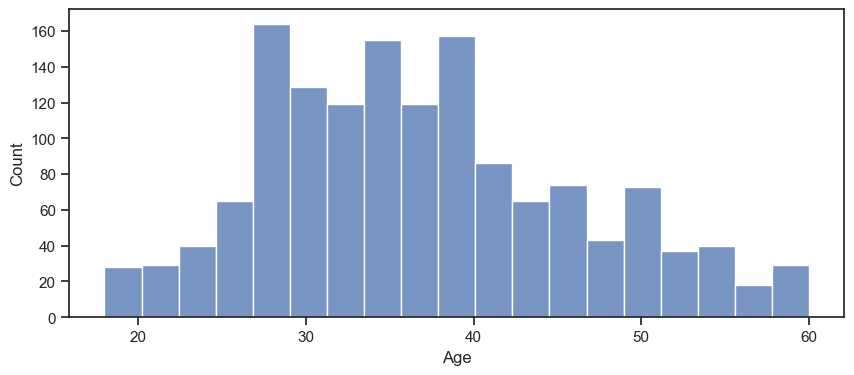

In [54]:

plt.figure(figsize=(10, 4))
sns.histplot(x='Age', data=df)

### Data Preprocessing

#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [70]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


### Convert the rest of the categorical values into numeric using dummy variables and store the results in a new dataframe called 'newdf'

In [71]:
newdf= pd.get_dummies(df)
newdf.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


#### Check the shape of our new dataset

In [72]:
newdf.shape

(1470, 53)

#### Print unique values in our new dataframe

In [73]:
for column in newdf.columns:
    unique_values = newdf[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Age: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Unique values in Attrition: [1 0]
Unique values in DailyRate: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  3

#### Split the columns into input and target variables (X and y)

In [74]:
X =  newdf.drop(columns = ['Attrition'])
y = newdf['Attrition']

#### Carry out Feature scaling using StandardScaler

In [75]:

from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
xcolumns = X.columns

In [78]:
X = scaler.fit_transform(X)

In [79]:
X = pd.DataFrame(X, columns = xcolumns)

In [80]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.3371,-0.481859,0.639841,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241


### Split the dataset into training and testing set

In [94]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=100)

## Machine Learning Models

### Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [118]:
model= LogisticRegression()
model


LogisticRegression()

In [119]:
model.fit(X_train, y_train)

LogisticRegression()

In [120]:
y_pred = model.predict(X_test)

In [121]:
metrics.accuracy_score(y_test, y_pred)

0.8662131519274376

In [122]:
metrics.confusion_matrix(y_test, y_pred)

array([[351,  20],
       [ 39,  31]], dtype=int64)

In [124]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       371
           1       0.61      0.44      0.51        70

    accuracy                           0.87       441
   macro avg       0.75      0.69      0.72       441
weighted avg       0.85      0.87      0.86       441



<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

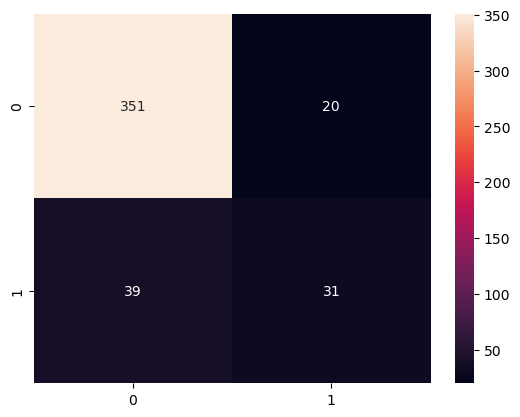

In [127]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')



### Random Forest Classifier
** Choose the best estimator and parameters :GridSearchCV**

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [148]:
model = RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

In [149]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.25, random_state = 20)

In [150]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

In [151]:
model.score(X_train, y_train)

0.9637023593466425

In [152]:
y_pred = model.predict(X_test)

In [153]:
metrics.accuracy_score(y_test, y_pred)

0.8586956521739131

In [163]:
param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]}

In [165]:
rf_model = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring= 'accuracy', verbose=3)

In [166]:
rf_model.fit(X_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV 1/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=1;, score=nan total time=   0.0s
[CV 2/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=1;, score=nan total time=   0.0s
[CV 3/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=1;, score=nan total time=   0.0s
[CV 1/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=20;, score=nan total time=   0.0s
[CV 2/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=20;, score=nan total time=   0.0s
[CV 3/3] END max_depth=0.5, n_estimators=16, n_jobs=1, random_state=20;, score=nan total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=1;, score=0.842 total time=   0.0s
[CV 3/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=1;, score=0.839 total time=   0.0s
[CV 1/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=10;, score=0.840 total time=   0.0s
[CV 2/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=10;, score=0.842 total time=   0.0s
[CV 3/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=10;, score=0.839 total time=   0.0s
[CV 1/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=20;, score=0.840 total time=   0.0s
[CV 2/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=20;, score=0.842 total time=   0.0s
[CV 3/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=20;, score=0.839 total time=   0.0s
[CV 1/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=42;, score=0.840 total time=   0.0s
[CV 2/3] END max_depth=1, n_estimators=16, n_jobs=1, random_state=42;, score=0.842 t

[CV 2/3] END max_depth=1, n_estimators=100, n_jobs=1, random_state=42;, score=0.842 total time=   0.3s
[CV 3/3] END max_depth=1, n_estimators=100, n_jobs=1, random_state=42;, score=0.839 total time=   0.2s
[CV 1/3] END max_depth=1, n_estimators=100, n_jobs=2, random_state=1;, score=0.840 total time=   0.2s
[CV 2/3] END max_depth=1, n_estimators=100, n_jobs=2, random_state=1;, score=0.842 total time=   0.2s
[CV 3/3] END max_depth=1, n_estimators=100, n_jobs=2, random_state=1;, score=0.839 total time=   0.2s
[CV 1/3] END max_depth=1, n_estimators=100, n_jobs=2, random_state=10;, score=0.840 total time=   0.2s
[CV 2/3] END max_depth=1, n_estimators=100, n_jobs=2, random_state=10;, score=0.842 total time=   0.2s
[CV 3/3] END max_depth=1, n_estimators=100, n_jobs=2, random_state=10;, score=0.839 total time=   0.2s
[CV 1/3] END max_depth=1, n_estimators=100, n_jobs=2, random_state=20;, score=0.840 total time=   0.2s
[CV 2/3] END max_depth=1, n_estimators=100, n_jobs=2, random_state=20;, scor

[CV 3/3] END max_depth=5, n_estimators=50, n_jobs=2, random_state=20;, score=0.853 total time=   0.1s
[CV 1/3] END max_depth=5, n_estimators=50, n_jobs=2, random_state=42;, score=0.856 total time=   0.1s
[CV 2/3] END max_depth=5, n_estimators=50, n_jobs=2, random_state=42;, score=0.864 total time=   0.1s
[CV 3/3] END max_depth=5, n_estimators=50, n_jobs=2, random_state=42;, score=0.856 total time=   0.1s
[CV 1/3] END max_depth=5, n_estimators=100, n_jobs=1, random_state=1;, score=0.853 total time=   0.3s
[CV 2/3] END max_depth=5, n_estimators=100, n_jobs=1, random_state=1;, score=0.861 total time=   0.3s
[CV 3/3] END max_depth=5, n_estimators=100, n_jobs=1, random_state=1;, score=0.850 total time=   0.3s
[CV 1/3] END max_depth=5, n_estimators=100, n_jobs=1, random_state=10;, score=0.853 total time=   0.3s
[CV 2/3] END max_depth=5, n_estimators=100, n_jobs=1, random_state=10;, score=0.864 total time=   0.3s
[CV 3/3] END max_depth=5, n_estimators=100, n_jobs=1, random_state=10;, score=0.

[CV 2/3] END max_depth=10, n_estimators=50, n_jobs=1, random_state=10;, score=0.853 total time=   0.1s
[CV 3/3] END max_depth=10, n_estimators=50, n_jobs=1, random_state=10;, score=0.847 total time=   0.1s
[CV 1/3] END max_depth=10, n_estimators=50, n_jobs=1, random_state=20;, score=0.861 total time=   0.1s
[CV 2/3] END max_depth=10, n_estimators=50, n_jobs=1, random_state=20;, score=0.864 total time=   0.1s
[CV 3/3] END max_depth=10, n_estimators=50, n_jobs=1, random_state=20;, score=0.864 total time=   0.1s
[CV 1/3] END max_depth=10, n_estimators=50, n_jobs=1, random_state=42;, score=0.853 total time=   0.1s
[CV 2/3] END max_depth=10, n_estimators=50, n_jobs=1, random_state=42;, score=0.861 total time=   0.1s
[CV 3/3] END max_depth=10, n_estimators=50, n_jobs=1, random_state=42;, score=0.864 total time=   0.1s
[CV 1/3] END max_depth=10, n_estimators=50, n_jobs=2, random_state=1;, score=0.867 total time=   0.1s
[CV 2/3] END max_depth=10, n_estimators=50, n_jobs=2, random_state=1;, sco

C:\Users\Dell\anaconda4\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
96 fits failed out of a total of 384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda4\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda4\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\Dell\anaconda4\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda4\lib\site-packages\sk

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]},
             scoring='accuracy', verbose=3)

In [167]:
rf_model.score(X_train, y_train)

0.9800362976406534

In [168]:
y_pred = rf_model.predict(X_test)

In [169]:
metrics.accuracy_score(y_test, y_pred)

0.8505434782608695

In [170]:
best_estimator = rf_model.best_estimator_

# Obtain the best parameters
best_parameters = rf_model.best_params_

# Obtain the best score
best_score = rf_model.best_score_

# Print the results
print("Best estimator is:", best_estimator)
print("Best parameters are:", best_parameters)
print("Best score is:", best_score)

Best estimator is: RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=1)
Best parameters are: {'max_depth': 10, 'n_estimators': 32, 'n_jobs': 1, 'random_state': 1}
Best score is: 0.8666059511116377


<span style = "color:blue"> Create Random forest model with the best parameters </span>

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
best_params = {'max_depth': 10, 'n_estimators': 32, 'n_jobs': 1, 'random_state': 20}
    

In [174]:
rf_model = RandomForestClassifier(**best_params)


In [175]:
rf_model.fit(X_train, y_train)  

RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

In [176]:
y_pred = rf_model.predict(X_test)

In [177]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       307
           1       0.74      0.23      0.35        61

    accuracy                           0.86       368
   macro avg       0.80      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368



In [183]:
print("accuracy score",metrics.accuracy_score(y_test, y_pred))
print("confuson matrix \n",metrics.confusion_matrix(y_test, y_pred))
print("classification report\n", metrics.classification_report(y_test, y_pred))
cross_val_scores = cross_val_score(rf_model, X, y, cv=5)  
print("Cross-validation scores:", cross_val_scores)

accuracy score 0.8586956521739131
confuson matrix 
 [[302   5]
 [ 47  14]]
classification report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       307
           1       0.74      0.23      0.35        61

    accuracy                           0.86       368
   macro avg       0.80      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368

Cross-validation scores: [0.84693878 0.86734694 0.86054422 0.8537415  0.85034014]


<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

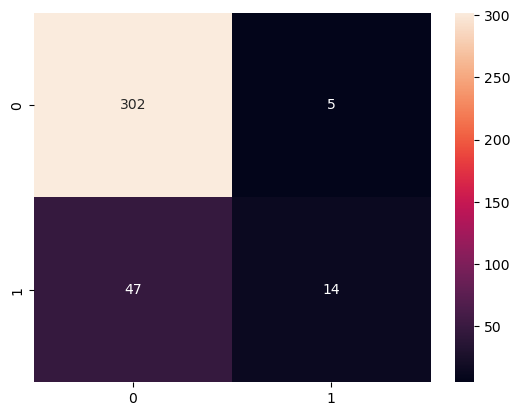

In [185]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Support Vector Machine

In [192]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [204]:
# Define the parameter grid
param_grid = {
    'C': [0.75, 0.85, 0.95, 1],
    'degree': [3, 4, 5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [205]:
# Create the SVM estimator
svm_estimator = SVC()


In [206]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_estimator, param_grid=param_grid)


In [207]:
# Fit the GridSearchCV object to your data
grid_search.fit(X, y)  # Replace X and y with your data


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [208]:
# Get the best estimator, best parameters, and best score
best_estimator = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best estimator is:", best_estimator)
print("Best parameters are:", best_parameters)
print("Best score is:", best_score)

Best estimator is: SVC(C=0.95, kernel='linear')
Best parameters are: {'C': 0.95, 'degree': 3, 'kernel': 'linear'}
Best score is: 0.883673469387755


In [209]:
print("accuracy score",metrics.accuracy_score(y_test, y_pred))
print("confuson matrix \n",metrics.confusion_matrix(y_test, y_pred))
print("classification report\n", metrics.classification_report(y_test, y_pred))
cross_val_scores = cross_val_score(grid_search, X, y, cv=5)  
print("Cross-validation scores:", cross_val_scores)

accuracy score 0.8586956521739131
confuson matrix 
 [[302   5]
 [ 47  14]]
classification report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       307
           1       0.74      0.23      0.35        61

    accuracy                           0.86       368
   macro avg       0.80      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368

Cross-validation scores: [0.88095238 0.86734694 0.88095238 0.88095238 0.9047619 ]


<span style = "color:orange"> Visualize confusion matrix </span>

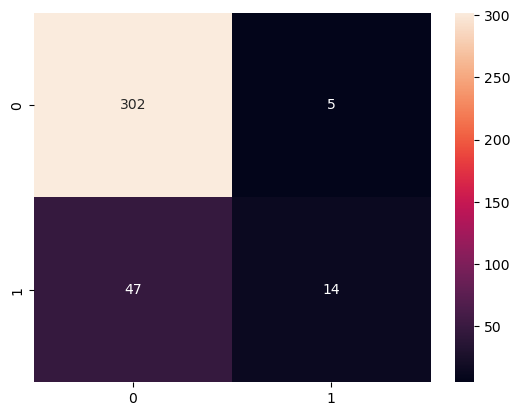

In [210]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()


### AdaBoost: Classifier

In [211]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [234]:
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


In [236]:
ada_boost.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [237]:
y_pred = ada_boost.predict(X_test)


In [238]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7913832199546486


In [239]:
metrics.confusion_matrix(y_pred,y_test)

array([[317,  38],
       [ 54,  32]], dtype=int64)

In [241]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       355
           1       0.46      0.37      0.41        86

    accuracy                           0.79       441
   macro avg       0.66      0.63      0.64       441
weighted avg       0.78      0.79      0.78       441



In [245]:
cross_val_score(ada_boost, X, y, cv=5) 

array([0.78911565, 0.78911565, 0.80612245, 0.75170068, 0.79251701])

<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

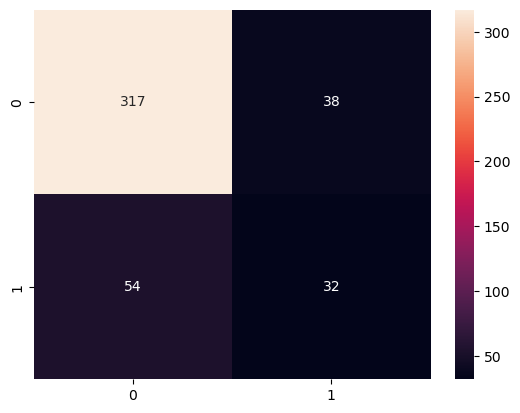

In [248]:
sns.heatmap(metrics.confusion_matrix(y_pred,y_test), annot= True, fmt='d')

### View score of different models in one dataframe

In [250]:

data = {
    'Models': ['Gradient Boost Classifier', 'Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier'],
    'Score': [0.886304, 0.877566, 0.861042, 0.856173]
}


df = pd.DataFrame(data)


df


,Models,Score
0,Gradient Boost Classifier,0.886304
1,Logistic Regression,0.877566
2,Support Vector Classifier,0.861042
3,Random Forest Classifier,0.856173


## Use PCA to reduce dimensionality of the data

#### Import PCA and fit our X_train

In [257]:

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#### Apply the mapping (transform) to both the training set and the test set.

In [258]:
pca = PCA(n_components=2)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### Import machine learning model of our choice, we are going with RandomForest for this problem

In [259]:
from sklearn.ensemble import RandomForestClassifier

#### Create RandomForest model with the best parameter we got earlier and train it

In [260]:
# Create RandomForest model with the best parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

#### Check the score of our model

In [261]:
# Check the score of the model
train_score = rf_model.score(X_train_pca, y_train)
print("Training Score:", train_score)


Training Score: 0.9132653061224489


#### Make predictions with X_test and check the accuracy score

In [262]:
# Make predictions with X_test and check the accuracy score
predictions = rf_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.8571428571428571


### Print Confusion matrix and Classification report

In [263]:
# Print Confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[246   9]
 [ 33   6]]


In [264]:
# Print Classification report
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.40      0.15      0.22        39

    accuracy                           0.86       294
   macro avg       0.64      0.56      0.57       294
weighted avg       0.82      0.86      0.83       294



***